In [1]:
# Importando as Bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Função de Exibição
def imshow(title = "Image", image = None, size = 15):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Detecção de Formas**

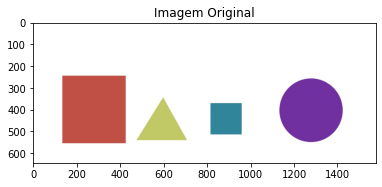

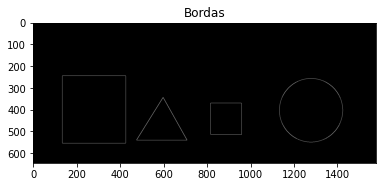

Número de contornos encontrados =  4


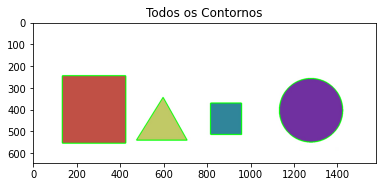

In [3]:
# Carregando e Exibindo Imagem
image = cv2.imread('/content/bunchofshapes.jpg')
imshow('Imagem Original', image)

# Convertendo para Escala de Cinza
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Detectando Bordas com Canny
edged = cv2.Canny(gray, 50, 200)
imshow('Bordas', edged)

# Encontrando Contornos
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Número de contornos encontrados = ", len(contours))

# Desenhando os Contornos
cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow('Todos os Contornos', image)

## **Enumeração de Formas**

In [4]:
## Função para exibir a área de contorno

def get_contour_areas(contours):
    """Retorna as áreas de todos os contornos como lista"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

Áreas de Contorno antes de classificar...
[20587.5, 22901.5, 66579.5, 90222.0]
Áreas de contorno após a classificação...
[90222.0, 66579.5, 22901.5, 20587.5]


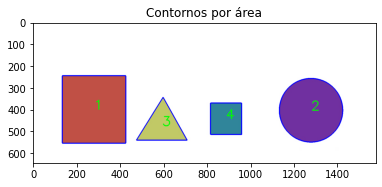

In [5]:
# áreas dos contornos antes de classificar
print("Áreas de Contorno antes de classificar...")
print(get_contour_areas(contours))

# Classificar contornos grandes a pequenos por área
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# áreas dos contornos após classificar
print("Áreas de contorno após a classificação...") 
print(get_contour_areas(sorted_contours))

# Enumeração das Formas
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contornos por área', image)

## **Momentos para Calcular o Centro**

In [6]:
# Função Necessarias

def x_cord_contour(contours):
    """Retorna a coordenada X para o centróide do contorno"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    """Coloca um círculo vermelho nos centros dos contornos"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

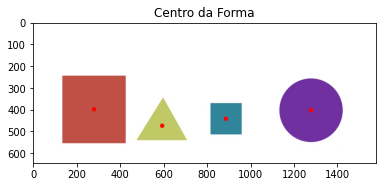

In [7]:
image = cv2.imread('/content/bunchofshapes.jpg')
orginal_image = image.copy()

# Centróides de contorno e desenhando na imagem
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
 
# Centro da Forma
imshow("Centro da Forma", image)

## **Ordenando Formas**

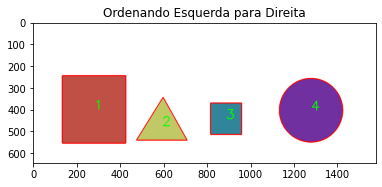

In [8]:
# Ordenando Esquerda para a Direita
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    (x, y, w, h) = cv2.boundingRect(c)  

imshow('Ordenando Esquerda para Direita', orginal_image)

## **Aproximando Contornos usando ApproxPolyDP**

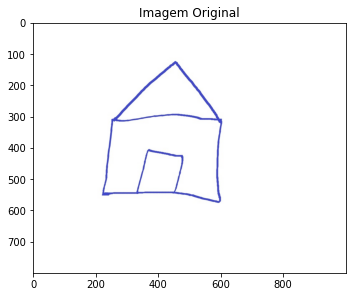

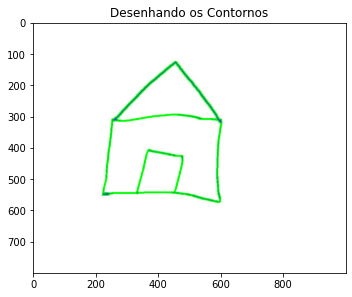

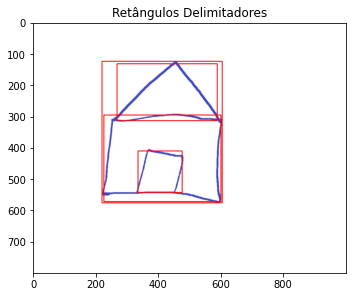

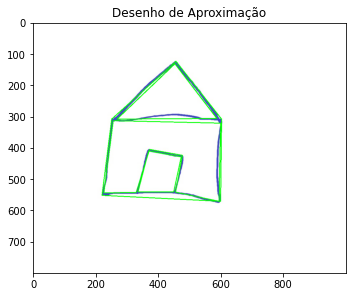

In [9]:
# Carregando, Exibindo Imagem e Gerando uma Copia
image = cv2.imread('/content/house.jpg')
orig_image = image.copy()
imshow('Imagem Original', orig_image, size = 7)
 
# Convertendo em Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Transformando a imagem em Binario
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Encontrando Contornos
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

imshow('Desenhando os Contornos', image, size = 7)

imshow('Retângulos Delimitadores', orig_image, size = 7)

# calculando o contorno aproximado
for c in contours:
    # Calcule a precisão como uma porcentagem do perímetro do contorno
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow('Desenho de Aproximação', copy, size = 7)

## **Convex Hull**

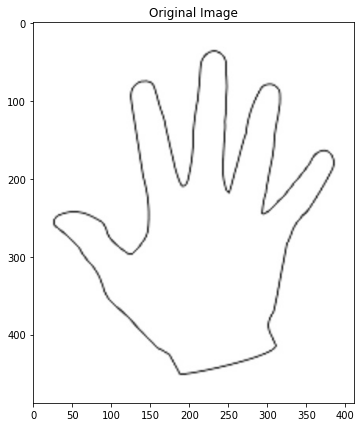

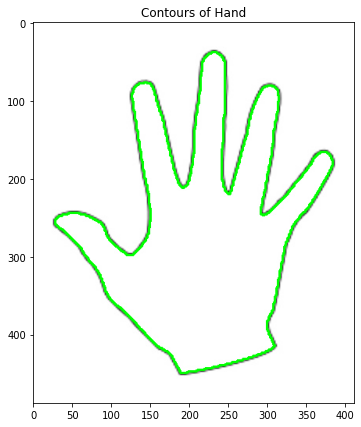

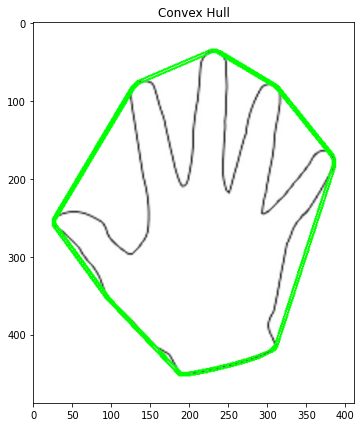

In [10]:
# Carregando Imagem e Gerando Copia
image = cv2.imread('/content/hand.jpg')
orginal_image = image.copy()

# Convertendo para Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow('Original Image', image, size=7)

# Limiarização da imagem
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Encontrando os Contornos
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, 0, (0, 255, 0), 2)
imshow('Contours of Hand', image, size=7)


# Ordenando os contornos por área
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(orginal_image, [hull], 0, (0, 255, 0), 2)
    
imshow('Convex Hull', orginal_image, size=7)

## **Matching de Contornos**

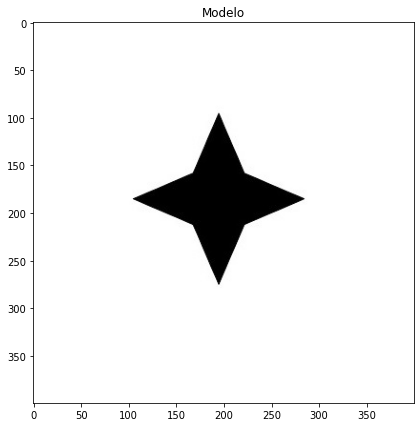

0.13081816783853514
0.15902005339788694
0.14987915682525596
0.07094034474475601


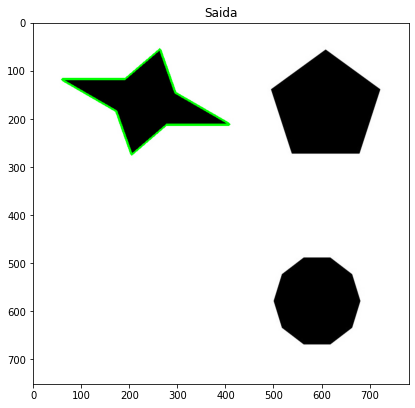

In [11]:
# Carregando e Exibindo Imagem
template = cv2.imread('/content/4star.jpg',0)
imshow('Modelo', template, size=7)

# Carregue a imagem para procuramos as formas
target = cv2.imread('/content/shapestomatch.jpg')
# Convertendo imagm para Escala de Cinza
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Limiarização
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Buscando Contornos
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Ordenando os Contornos para ajudar na busca
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extraindo o contorno modelo
template_contour = contours[1]

# Extraindo o contorno desejado
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # Comparando as formas
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)

    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
imshow('Saida', target, size=7)

## **Detecção de Linha**

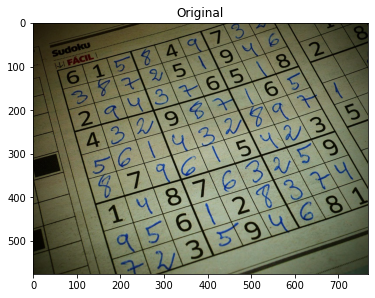

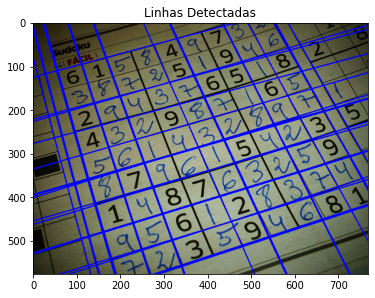

In [12]:
# Carregando e Exibindo Imagem
image = cv2.imread('/content/soduku.jpg')
imshow('Original', image, size = 8)

# Convertendo imagem para Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Aplicando a Detecção de Bordas
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Aplicando a Transformada de Hough para achar as Linhas
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# Iterando cada linha e a convertemos para o formato exigido
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow('Linhas Detectadas', image, size = 8)

## **Linhas Probabilísticas - Transformação de Hough**

(63, 1, 4)


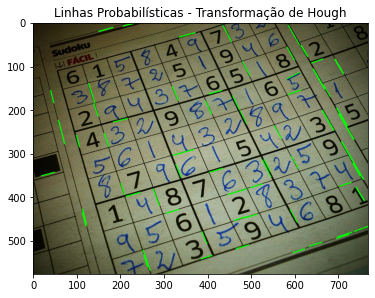

In [13]:
# Carregando Imagem
image = cv2.imread('/content/soduku.jpg')
# Convertendo para Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detecção de Bordas com Canny
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Aplicando a Transformação Probabilística Hough Line
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 3, 25)
print(lines.shape)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

imshow('Linhas Probabilísticas - Transformação de Hough', image, size = 8)

## **Detecção de Circulo**

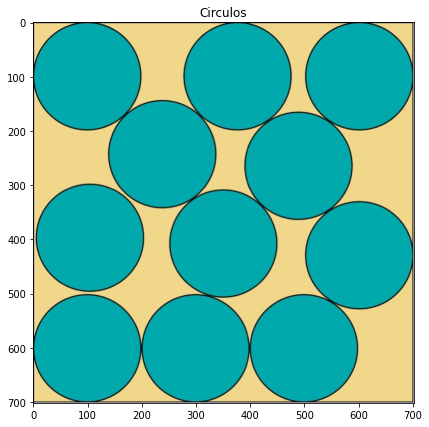

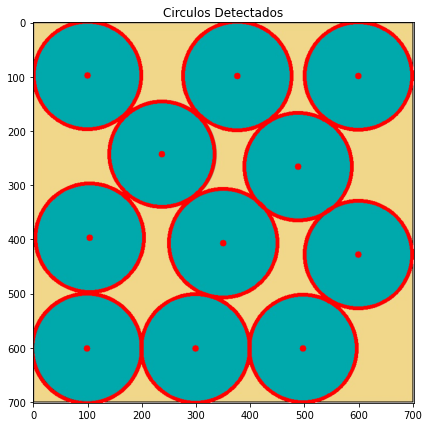

In [14]:
# Carregando e Exibindo Imagem
image = cv2.imread('Circles_Packed.jpeg')
imshow('Circulos', image, size = 7)
# Convertendo para escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicando filtro Mediano
blur = cv2.medianBlur(gray, 5)

# Aplicando a detcção dos circulos
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # Desenhando círculo externo
    cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 5)
    
    # Marcando o centro do Circulo
    cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 8)

imshow('Circulos Detectados', image, size = 7)

## **Detecção de Bolhas**

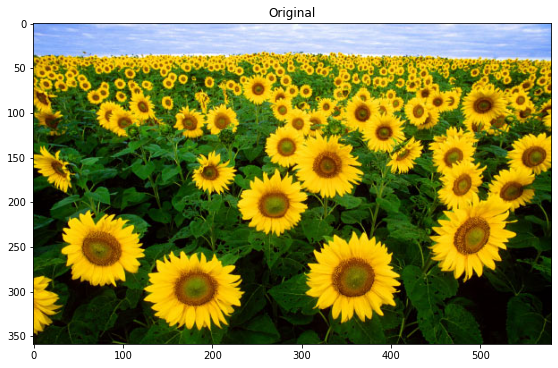

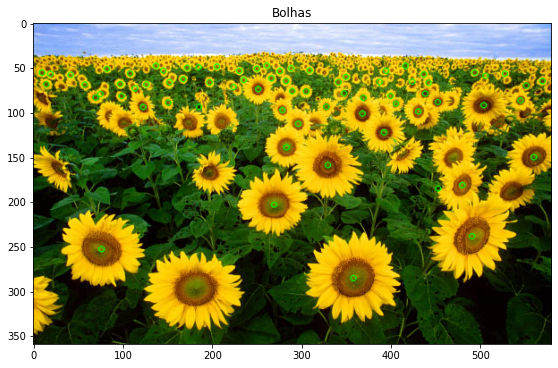

In [15]:
# Carregando e Exibindo Imagem
image = cv2.imread("/content/Sunflowers.jpg")
imshow("Original", image, size = 15)

# Congiguração padrão do Detector
detector = cv2.SimpleBlobDetector_create()
 
# Detectando bolhas
keypoints = detector.detect(image)
 
# Marcação
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 
# Mostrando Detecção
imshow("Bolhas", blobs, size = 15)

## **Contando Bolhas e Circulos**

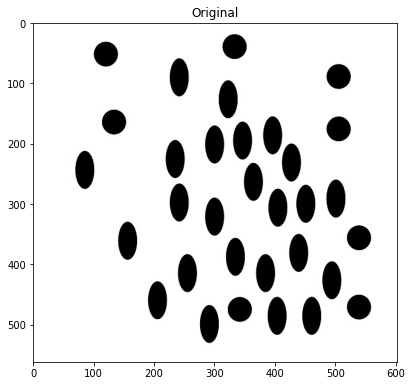

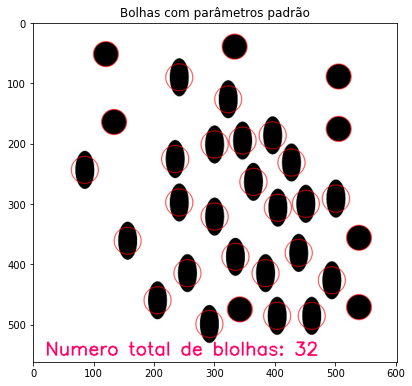

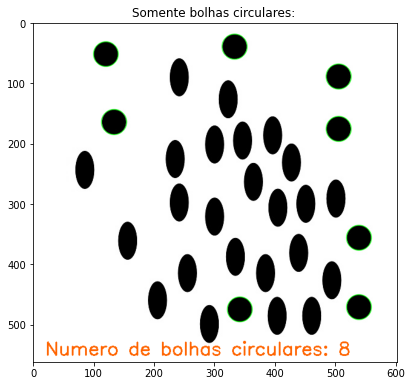

In [16]:
# Carregando e Exibindo Imagem
image = cv2.imread("/content/blobs.jpg", 0)
imshow('Original', image, size = 7)

# Inicializando o detector usando os parâmetros padrão
detector = cv2.SimpleBlobDetector_create()
 
# Detectando as bolhas
keypoints = detector.detect(image)
 
# Desenhe bolhas de vermelho
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Numero total de blolhas: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Exibindo imagem
imshow("Bolhas com parâmetros padrão", blobs, size = 7)

# Filtrando Parâmetros
params = cv2.SimpleBlobDetector_Params()

# Parâmetros de filtragem de área
params.filterByArea = True
params.minArea = 100

# Parâmetros de filtragem de circularidade
params.filterByCircularity = True 
params.minCircularity = 0.9

# Parâmetros de filtragem de convexidade
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Parâmetros de filtragem de inércia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Passando os parametros definidos para o detector
detector = cv2.SimpleBlobDetector_create(params)
    
# Detectando as bolhas
keypoints = detector.detect(image)

# Marcando a deteção
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Numero de bolhas circulares: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Somente bolhas circulares: ", blobs, size = 7)

## **Matching Personagem**

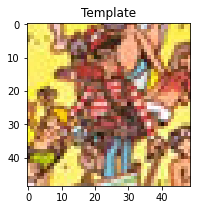

In [17]:
# Carregando e Exibindo Imagem
template = cv2.imread('/content/waldo.jpg')
imshow('Template', template, size = 3)

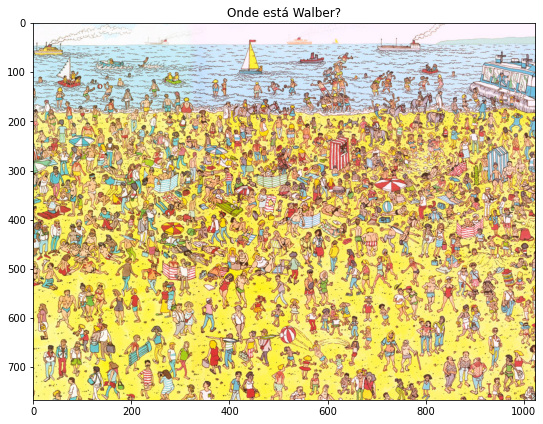

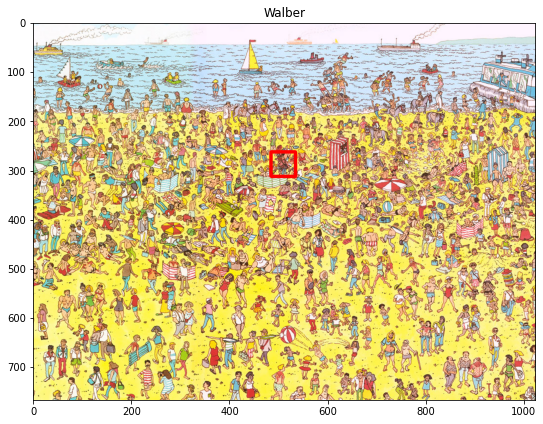

In [18]:
# Carregando e Exibindo Imagem
image = cv2.imread('/content/WaldoBeach.jpg')
imshow('Onde está Walber?', image, size = 12)

# Convertendo em escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Carregando modelo
template = cv2.imread('/content/waldo.jpg', 0)

# Pesquisando a localização de uma imagem de modelo em uma imagem maior.
result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Criando Marcador
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow('Walber', image, size = 12)